In [3]:
%matplotlib inline
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.style.available

['fivethirtyeight',
 'seaborn-pastel',
 'grayscale',
 'seaborn-deep',
 'seaborn-bright',
 'seaborn-paper',
 'dark_background',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-poster',
 'classic',
 'seaborn-notebook',
 'seaborn-muted',
 'bmh',
 'ggplot',
 'seaborn-white',
 'seaborn-ticks',
 'seaborn-darkgrid',
 'seaborn-whitegrid',
 'seaborn-colorblind',
 'seaborn',
 'seaborn-talk']

In [5]:
plt.style.use('ggplot')

In [16]:
N = 8
X = np.random.rand(N,1)
Y = np.sin(12*X) + 0.66*np.cos(25*X) + np.random.randn(N,1)*0.1 + 3

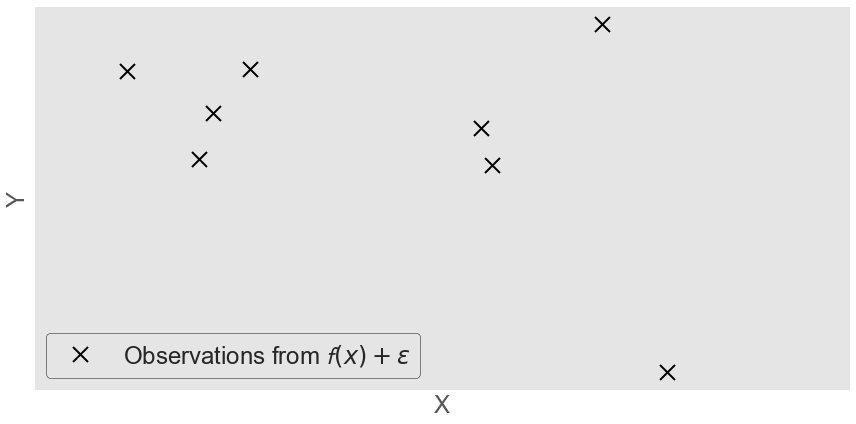

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(X, Y, 'kx', mew=2, label=r"Observations from $\mathcal{f}(x) + \epsilon$", markersize=15)
ax.set_xlabel('X', fontsize=24)
ax.set_ylabel('Y', fontsize=24)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-0.1, 1.1)
leg = ax.legend(loc='lower left',fontsize=24, frameon=True)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_alpha(0.9)
ax.grid('off')
plt.tight_layout()
# plt.savefig('obser÷vations.pdf', dpi=1000)

In [19]:
k = gpflow.kernels.Matern52(1, lengthscales=0.3)
m = gpflow.gpr.GPR(X, Y, kern=k)
m.likelihood.variance = 0.01

In [20]:
m.optimize()

      fun: 11.838563726679629
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.32418398e-06,   7.47285600e-08,  -2.37241661e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 19
      nit: 17
   status: 0
  success: True
        x: array([-1.16463259,  9.98577786, -3.48800849])

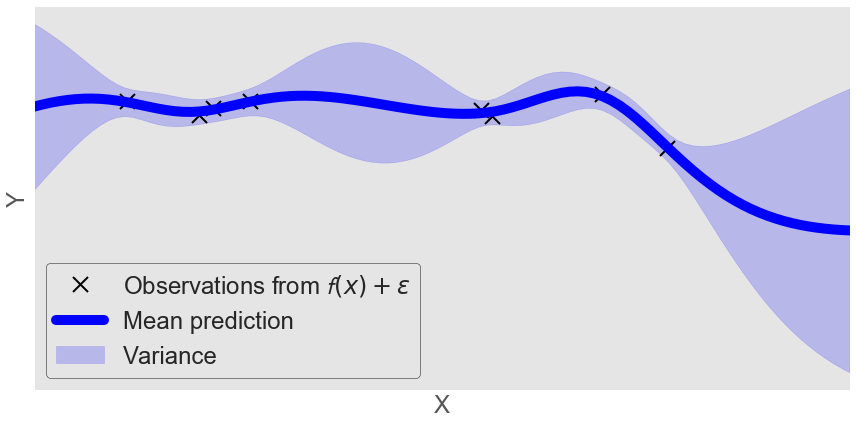

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
xx = np.linspace(-0.1, 1.1, 100)[:,None]
mean, var = m.predict_y(xx)
ax.plot(X, Y, 'kx', mew=2, label=r"Observations from $\mathcal{f}(x) + \epsilon$", markersize=15)
ax.plot(xx, mean, 'b', lw=10, label='Mean prediction')
ax.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2, 
               label='Variance')
ax.set_xlabel('X', fontsize=24)
ax.set_ylabel('Y', fontsize=24)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-0.1, 1.1)
leg = ax.legend(loc='lower left',fontsize=24, frameon=True)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_alpha(0.9)
ax.grid('off')
plt.tight_layout()
plt.savefig('observations_gp_mean_variance.pdf', dpi=1000)